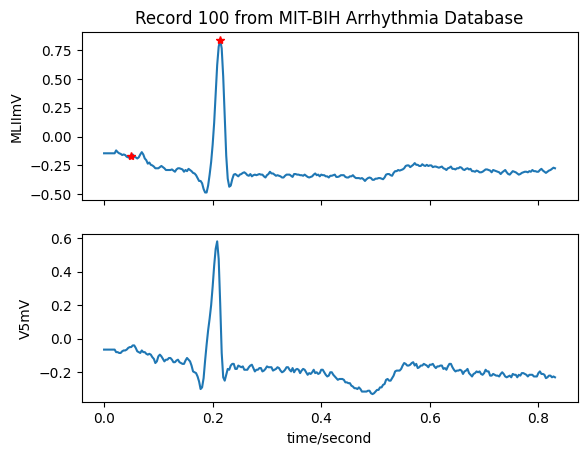

{'record_name': '100',
 'extension': 'atr',
 'sample': array([18, 77], dtype=int64),
 'symbol': ['+', 'N'],
 'subtype': array([0, 0]),
 'chan': array([0, 0]),
 'num': array([0, 0]),
 'aux_note': ['(N\x00', ''],
 'fs': 360,
 'label_store': None,
 'description': None,
 'custom_labels': None,
 'contained_labels': None,
 'ann_len': 2}

[18 77]


In [2]:
import copy
import wfdb
import numpy as np
import pandas as pd
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute

SAMPLE_NUM = 300

record = wfdb.rdrecord('src/mitdb/100', sampto = SAMPLE_NUM)
annotation = wfdb.rdann('src/mitdb/100', 'atr', sampto = SAMPLE_NUM)
#record = wfdb.rdrecord('src/mitdb/100')
#annotation = wfdb.rdann('src/mitdb/100', 'atr')

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')
display(annotation.__dict__)
print(annotation.sample)
#display(record.__dict__)


In [2]:
# Prepare the error vector

# Symbols indicating arrhythmia
err_list = ['S', 'V', 'F', 'Q', 'A']
#print(annotation.sample)

# Extract annotation symbols
v_sym = annotation.symbol
v_sym = np.array(v_sym)
v_sym = v_sym[:,None]

# Initialize array of annotations
v_ann = annotation.sample
y = np.zeros(shape=(len(v_ann)+1), dtype=int)
#print(v_ann)

# Setting to 1 locations where arrhythmia is present
for i in range(len(v_sym)):
    if v_sym[i] in err_list:
        y[i] = 1
    else:
        y[i] = 0

y = pd.Series(y) 
#print(v_sym)
print(v_ann)
print(y)
print(len(y))

[18 77]
0    0
1    0
2    0
dtype: int32
3


In [3]:
v_data = record.p_signal
v_id = np.ones(shape=(v_data[:,0].size,1), dtype=int)
v_time = np.arange(0, v_data[:,0].size, 1, dtype=int)
timeseries = pd.DataFrame({'id': v_id[:,0], 'time': v_time, 'MLII': v_data[:,0]})
print(timeseries.tail())
timeseries.size

     id  time   MLII
167   1   167 -0.370
168   1   168 -0.355
169   1   169 -0.330
170   1   170 -0.325
171   1   171 -0.325


516

In [4]:
# Sample array
array = annotation.sample

# Assigning initial value to id column
timeseries['id'] = 0

# Iterate through the time values
for i in range(len(array)):
    if i == 0:
        timeseries.loc[timeseries['time'] <= array[i], 'id'] = i + 1
    else:
        timeseries.loc[(timeseries['time'] > array[i - 1]) & (timeseries['time'] <= array[i]), 'id'] = i + 1

timeseries.loc[timeseries['time'] > array[-1], 'id'] = len(array) + 1

print(annotation.sample)
print(array)
print(timeseries)

[18 77]
[18 77]
     id  time   MLII
0     1     0 -0.170
1     1     1 -0.155
2     1     2 -0.175
3     1     3 -0.180
4     1     4 -0.190
..   ..   ...    ...
167   3   167 -0.370
168   3   168 -0.355
169   3   169 -0.330
170   3   170 -0.325
171   3   171 -0.325

[172 rows x 3 columns]


In [5]:
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")
#print(extracted_features.head())
print(extracted_features.tail())
print(len(extracted_features))

Feature Extraction: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]

   MLII__variance_larger_than_standard_deviation  MLII__has_duplicate_max  \
1                                            0.0                      0.0   
2                                            0.0                      0.0   
3                                            0.0                      0.0   

   MLII__has_duplicate_min  MLII__has_duplicate  MLII__sum_values  \
1                      1.0                  1.0            -3.930   
2                      1.0                  1.0           -12.085   
3                      0.0                  1.0           -32.250   

   MLII__abs_energy  MLII__mean_abs_change  MLII__mean_change  \
1          0.851700               0.014722          -0.005833   
2          8.190125               0.054655          -0.001207   
3         11.085400               0.007688           0.000161   

   MLII__mean_second_derivative_central  MLII__median  ...  \
1                             -0.000441         -0.19  ...   
2                            

In [6]:
impute(extracted_features)
y.index = extracted_features.id
features_filtered = select_features(extracted_features, y)

c:\Users\umber\Documents\Polito\TESI\python\.venv\Lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['MLII__fft_coefficient__attr_"real"__coeff_48'
 'MLII__fft_coefficient__attr_"real"__coeff_49'
 'MLII__fft_coefficient__attr_"real"__coeff_50'
 'MLII__fft_coefficient__attr_"real"__coeff_51'
 'MLII__fft_coefficient__attr_"real"__coeff_52'
 'MLII__fft_coefficient__attr_"real"__coeff_53'
 'MLII__fft_coefficient__attr_"real"__coeff_54'
 'MLII__fft_coefficient__attr_"real"__coeff_55'
 'MLII__fft_coefficient__attr_"real"__coeff_56'
 'MLII__fft_coefficient__attr_"real"__coeff_57'
 'MLII__fft_coefficient__attr_"real"__coeff_58'
 'MLII__fft_coefficient__attr_"real"__coeff_59'
 'MLII__fft_coefficient__attr_"real"__coeff_60'
 'MLII__fft_coefficient__attr_"real"__coeff_61'
 'MLII__fft_coefficient__attr_"real"__coeff_62'
 'MLII__fft_coefficient__attr_"real"__coeff_63'
 'MLII__fft_coefficient__attr_"real"__coeff_64'
 'MLII__fft_coefficient__attr_"real"__coef

AttributeError: 'DataFrame' object has no attribute 'id'

In [ ]:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(timeseries, y, column_id='id', column_sort='time')

AssertionError: y needs to be a pandas.Series, received type: <class 'numpy.ndarray'>.